# Project : Fake News Detection

### Step: 1 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string

### Step: 2 Importing the datasets

In [45]:
fake_data = pd.read_csv("Fake.csv")
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [46]:
true_data = pd.read_csv("True.csv")
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake_data.shape

(23481, 4)

In [5]:
true_data.shape

(21417, 4)

### Step: 3 Add labels  

In [6]:
fake_data["label"] = 1
true_data["label"] = 0

### Step: 4 Convert 'date' to datetime format

In [7]:
fake_data["date"] = pd.to_datetime(fake_data["date"], errors="coerce")
true_data["date"] = pd.to_datetime(true_data["date"], errors="coerce")

### Step: 5 Remove duplicates

In [8]:
fake_data = fake_data.drop_duplicates()
true_data = true_data.drop_duplicates()

### Step: 6 Clean text

In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\W", " ", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text

fake_data["title"] = fake_data["title"].apply(clean_text)
fake_data["text"] = fake_data["text"].apply(clean_text)
true_data["title"] = true_data["title"].apply(clean_text)
true_data["text"] = true_data["text"].apply(clean_text)

### Step: 7 Merge both the dataset

In [10]:
merged_data = pd.concat([fake_data, true_data], ignore_index=True)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44688 entries, 0 to 44687
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    44688 non-null  object        
 1   text     44688 non-null  object        
 2   subject  44688 non-null  object        
 3   date     33079 non-null  datetime64[ns]
 4   label    44688 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.7+ MB


In [11]:
merged_data.head()

,title,text,subject,date,label
0,donald trump sends out embarrassing new year s...,donald trump just couldn t wish all americans ...,News,2017-12-31,1
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,News,2017-12-31,1
2,sheriff david clarke becomes an internet joke ...,on friday it was revealed that former milwauke...,News,2017-12-30,1
3,trump is so obsessed he even has obama s name ...,on christmas day donald trump announced that h...,News,2017-12-29,1
4,pope francis just called out donald trump duri...,pope francis used his annual christmas day mes...,News,2017-12-25,1


In [12]:
print(merged_data.isnull().sum())

title          0
text           0
subject        0
date       11609
label          0
dtype: int64


# Data Preprocessing

To clean and prepare the text data for analysis and model training
1. Convert text to lowercase for consistency
2. Remove non-alphabetic characters to keep only meaningful words
3. Filter out stopwords (common words like "the," "is," "and") using NLTK’s stopwords list
4. Tokenize and count frequent words in real and fake news articles

In [13]:
!pip install wordcloud
from collections import Counter
import nltk
from wordcloud import WordCloud

df = merged_data
print(df.head())

nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

def get_top_words(text_data, top_n=20):
    words = " ".join(text_data).lower()
    words = re.sub(r"[^a-zA-Z]", " ", words)  # Remove non-alphabetic characters
    words = words.split()
    words = [word for word in words if word not in stop_words]
    return Counter(words).most_common(top_n)

print("Most Common Words in Fake News:\n", get_top_words(df[df["label"]==1]["text"]))
print("\n Most Common Words in Real News:\n", get_top_words(df[df["label"]==0]["text"]))

                                               title  \
0  donald trump sends out embarrassing new year s...   
1  drunk bragging trump staffer started russian c...   
2  sheriff david clarke becomes an internet joke ...   
3  trump is so obsessed he even has obama s name ...   
4  pope francis just called out donald trump duri...   

                                                text subject       date  label  
0  donald trump just couldn t wish all americans ...    News 2017-12-31      1  
1  house intelligence committee chairman devin nu...    News 2017-12-31      1  
2  on friday it was revealed that former milwauke...    News 2017-12-30      1  
3  on christmas day donald trump announced that h...    News 2017-12-29      1  
4  pope francis used his annual christmas day mes...    News 2017-12-25      1  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Most Common Words in Fake News:
 [('trump', 79939), ('said', 33761), ('president', 27810), ('people', 26591), ('one', 24588), ('would', 23564), ('clinton', 19208), ('obama', 18838), ('like', 18116), ('donald', 17790), ('also', 15420), ('us', 14849), ('news', 14687), ('new', 14416), ('hillary', 14182), ('even', 14067), ('time', 13879), ('state', 13472), ('white', 13190), ('via', 12834)]

 Most Common Words in Real News:
 [('said', 97867), ('trump', 54100), ('u', 44055), ('would', 31249), ('reuters', 28681), ('president', 27881), ('state', 20808), ('government', 18552), ('new', 16758), ('house', 16492), ('states', 16423), ('republican', 16149), ('also', 15754), ('united', 15368), ('people', 15089), ('year', 14599), ('told', 14072), ('could', 13538), ('one', 13250), ('washington', 12889)]



# Exploratory Data Analysis (EDA)

Exploratory Data Analysis was performed to understand the distribution of fake and real news, identify key text patterns, and clean the dataset for effective model training.

### Step: 1 Visualizing missing values

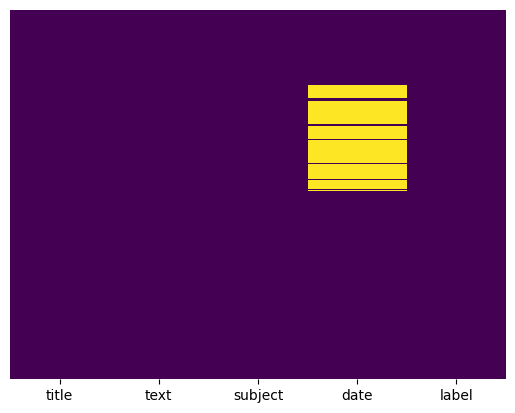

In [14]:
# heatmap: A quick way to detect missing values visually!
# Bright areas in the heatmap = Missing values (NaN).
# Dark areas = No missing values.

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

### Step: 2 Summary statistics of the dataset

In [15]:
df.describe()

,date,label
count,33079,44688.000000
mean,2017-03-09 10:40:44.983222016,0.525354
min,2015-05-01 00:00:00,0.000000
25%,2016-08-29 00:00:00,0.000000
50%,2017-04-27 00:00:00,1.000000
75%,2017-10-09 00:00:00,1.000000
max,2017-12-31 00:00:00,1.000000
std,NaN,0.499362


### Step: 3 Check data types and overall info

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44688 entries, 0 to 44687
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    44688 non-null  object        
 1   text     44688 non-null  object        
 2   subject  44688 non-null  object        
 3   date     33079 non-null  datetime64[ns]
 4   label    44688 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.7+ MB


### Step: 4 Plot class distribution

<ipython-input-17-72efcd680b4f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='coolwarm')


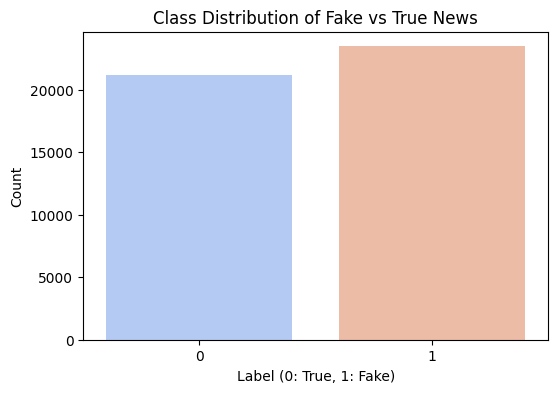

In [17]:
# a bar chart to visualize how many Fake News (0) and Real News (1).
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='coolwarm')
plt.title('Class Distribution of Fake vs True News')
plt.xlabel('Label (0: True, 1: Fake)')
plt.ylabel('Count')
plt.show()

### Step: 5 Generate WordCloud for Fake News and Real News,Plot word clouds

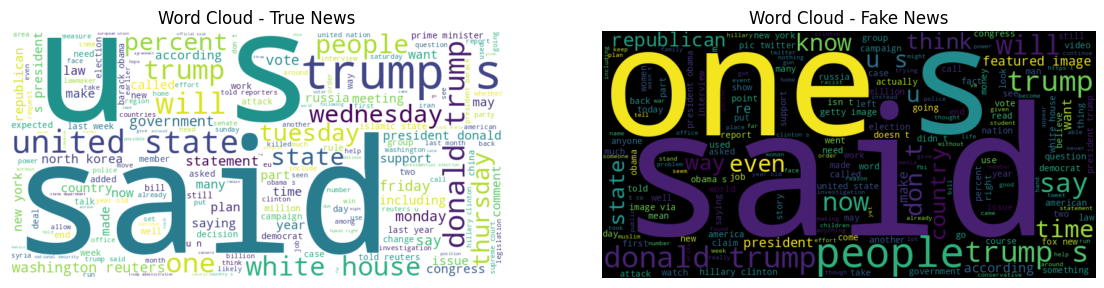

In [ ]:
from wordcloud import WordCloud

fake_text = " ".join(df[df['label'] == 1]['text'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='black').generate(fake_text)

real_text = " ".join(df[df['label'] == 0]['text'])
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)

fig, ax = plt.subplots(1, 2, figsize=(14,6))
ax[0].imshow(wordcloud_real, interpolation='bilinear')
ax[0].set_title('Word Cloud - True News')
ax[0].axis('off')

ax[1].imshow(wordcloud_fake, interpolation='bilinear')
ax[1].set_title('Word Cloud - Fake News')
ax[1].axis('off')

plt.show()

## Model Development:

Building and training machine learning models (Logistic Regression) using TF-IDF (Term Frequency-Inverse Document Frequency), which converts text into numerical features by weighing important words, to detect fake news.

### Step: 1 Import Necessary Libraries

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.model_selection import RandomizedSearchCV

### Step: 2 Split Dataset into Training & Testing Sets

In [19]:
X = df['text']
y = df['label']

### Step: 3 Split into training and testing sets (80% train, 20% test)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
# Create raw version of the test dataset before vectorization
X_raw = df["text"]
y = df["label"]

X_train_raw, X_test_raw, _, _ = train_test_split(X_raw, y, test_size=0.2, random_state=42, stratify=y)

# Show 5 sample news articles from the test dataset
for i, text in enumerate(X_test_raw.sample(5, random_state=1)):
    print(f"News Sample {i+1}:\n{text}\n{'-'*80}\n")


News Sample 1:
former president george w bush gave a speech on thursday in which he said that bigotry seems emboldened in the u s and warned that americans need to reject white supremacy this is the speech that trump should have given even before the nazi march in charlottesville donald trump was backed by every white supremacist group across the board during his divisive campaign although bush pointed to the governing class he did not mention the former reality show star s name but it was obvious that he was talking about trump his policies and his base bush spoke of our discourse being degraded by casual cruelty he continued to say that we ve seen nationalism distorted into nativism and added that we need to recover and recall our own identity discontent deepened and sharpened partisan conflicts in recent years bush said in remarks from new york city at a forum focused on security and sponsored by the george w bush institute bigotry seems emboldened our politics seem more vulnerable 

### Step: 4 Text Vectorization using TF-IDF

In [22]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train = tfidf_vectorizer.fit_transform(X_train_raw)
X_test = tfidf_vectorizer.transform(X_test_raw)

In [44]:
print(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3842144 stored elements and shape (35750, 3000)>
  Coords	Values
  (0, 2910)	0.04396698304617234
  (0, 2330)	0.03315628367146623
  (0, 2066)	0.06289720859513609
  (0, 311)	0.059922494817896126
  (0, 1855)	0.2861829703102644
  (0, 729)	0.07411178267288433
  (0, 2484)	0.07468827241371598
  (0, 2087)	0.08595490670226497
  (0, 2705)	0.08067463331914512
  (0, 2926)	0.10760013443020774
  (0, 1543)	0.0763588185044428
  (0, 1851)	0.1911296867228113
  (0, 1560)	0.057944924400244534
  (0, 1208)	0.19805604503079302
  (0, 2504)	0.07740893857619847
  (0, 746)	0.05148635248693144
  (0, 2937)	0.09297287979468513
  (0, 1320)	0.08653747967070116
  (0, 2385)	0.12557853776159922
  (0, 2753)	0.07857971788725632
  (0, 2065)	0.07430202293018788
  (0, 1955)	0.06294491961946995
  (0, 2068)	0.09419518035400877
  (0, 2461)	0.35623184406371894
  (0, 1600)	0.06668294801840882
  :	:
  (35749, 2528)	0.07871825120338409
  (35749, 1051)	0.04495253623792174

### Step: 5 Training the Model:Logistic Regression

In [24]:
model=LogisticRegression()

In [25]:
model.fit(X_train, y_train)

LogisticRegression()

## Evaluation

In [28]:
x_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [29]:
print("accuracy score of traing data:",training_data_accuracy)

accuracy score of traing data: 0.9892027972027972


In [30]:
x_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [31]:
print("accuracy score of testing data:",testing_data_accuracy)

accuracy score of testing data: 0.984672186171403


In [32]:
print("Classification Report for Logistic Regression:\n", classification_report(y_test, x_test_prediction))

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      4242
           1       0.99      0.98      0.99      4696

    accuracy                           0.98      8938
   macro avg       0.98      0.98      0.98      8938
weighted avg       0.98      0.98      0.98      8938



In [33]:
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, x_test_prediction))

Confusion Matrix for Logistic Regression:
[[4185   57]
 [  80 4616]]


### Prediction

In [40]:
# Check if model predictions on test samples match actual labels
for i in range(5):
    text = X_test_raw.iloc[i]
    true_label = y_test.iloc[i]

    # Vectorize and predict
    text_vector = tfidf_vectorizer.transform([text])
    prediction = model.predict(text_vector)[0]

    print(f"\nSample {i+1}")
    print(f"News: {text[:300]}...")  # Short preview
    print(f"Actual Label: {'Fake' if true_label == 1 else 'Real'}")
    print(f"Predicted: {'Fake' if prediction == 1 else 'Real'}")
    print("-" * 80)



Sample 1
News: louisville ky reuters officials for a kentucky county will appeal a federal judge s ruling that invalidated its right to work law the county s lawyer said on thursday the ruling came a year after labor organizations sued hardin county after it passed an ordinance that prohibited unions from mandatin...
Actual Label: Real
Predicted: Real
--------------------------------------------------------------------------------

Sample 2
News: who exactly will gray and burguiere of glenn beck s blaze see fit to cover will they double down on lindsey graham maybe they plan to focus more on jeb bush no more trump glenn beck s program with pat gray and stu burguiere is taking huffpost s stance on donald trump a giant step further they re goi...
Actual Label: Fake
Predicted: Fake
--------------------------------------------------------------------------------

Sample 3
News: ...
Actual Label: Fake
Predicted: Fake
-------------------------------------------------------------------------

###Save Model and Vectorizer:

In [35]:
import pickle

# Save model
with open("model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

# Save vectorizer
with open("vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)

#### Download the files

In [36]:
from google.colab import files
files.download("model.pkl")
files.download("vectorizer.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Model Deployment with Gradio

In [37]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 134.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.1 MB/s eta 0:00:00


In [38]:
import gradio as gr

# Load model and vectorizer
with open("model.pkl", "rb") as model_file:
    model = pickle.load(model_file)
with open("vectorizer.pkl", "rb") as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)

# Text Preprocessing (Simple Enhancement for Performance)
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    text = re.sub("\s+", " ", text).strip()  # Remove extra spaces
    return text

# Prediction function with confidence score and loading feedback
def predict_news(text):
    text = clean_text(text)
    if not text:
        return "⚠️ Please enter some text to analyze."

    transformed_input = vectorizer.transform([text])
    prediction = model.predict(transformed_input)
    confidence = np.max(model.predict_proba(transformed_input)) * 100  # Confidence Score

    label = "🟢 Real News" if prediction[0] == 0 else "🔴 Fake News"
    return f"{label} (Confidence: {confidence:.2f}%)"

# Custom Styling for an Engaging UI
css = """
body { background-color: #1a1a2e; color: #ffffff; font-family: 'Poppins', sans-serif; }
h1 { color: #ffcc00; text-align: center; font-size: 28px; }
.gr-textbox { background-color: #2c2c3e; border: 2px solid #ffcc00; color: white; padding: 12px; font-size: 16px; border-radius: 8px; }
.gr-button { background-color: #ff5722 !important; color: white !important; font-size: 18px; font-weight: bold; border-radius: 10px; padding: 12px 20px; }
.gr-container { max-width: 650px; margin: auto; padding: 25px; border-radius: 15px; background-color: #2c2c3e; box-shadow: 0px 0px 15px rgba(255, 204, 0, 0.7); }
.footer { text-align: center; font-size: 14px; margin-top: 20px; color: #aaaaaa; }
"""

# Gradio Interface with Improved UI & Friendly Text
interface = gr.Interface(
    fn=predict_news,
    inputs=gr.Textbox(label="📝 Enter News Text", placeholder="Paste a news article here... (e.g., 'Breaking news: AI detects fake articles!')"),
    outputs=gr.Textbox(label="🔍 Prediction Output"),
    title="📰 Fake News Detection System ",
    description="📢 **Check if a news article is real or fake in seconds!** Just paste the news text below, and our AI will determine if it's **real or fake** 🧐. Now with **confidence scores** for transparency! ✅",
    theme="dark",
    css=css,
)

interface.launch(share=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gradio/blocks.py:1114: UserWarning: Cannot load dark. Caught Exception: 404 Client Error: Not Found for url: https://huggingface.co/api/spaces/dark (Request ID: Root=1-680a2c8b-784f483d3f59e29276ab63d3;508d656b-6c45-4eda-a75d-b75e0f80cd6a)

Sorry, we can't find the page you are looking for.
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://01b2cfffc41390dbd1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
